In [188]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [189]:
Q0 =fits.open('AS1A06_clean_Q0.lc')
Q1 =fits.open('AS1A06_clean_Q1.lc')
Q2 =fits.open('AS1A06_clean_Q2.lc')
Q3 =fits.open('AS1A06_clean_Q3.lc')

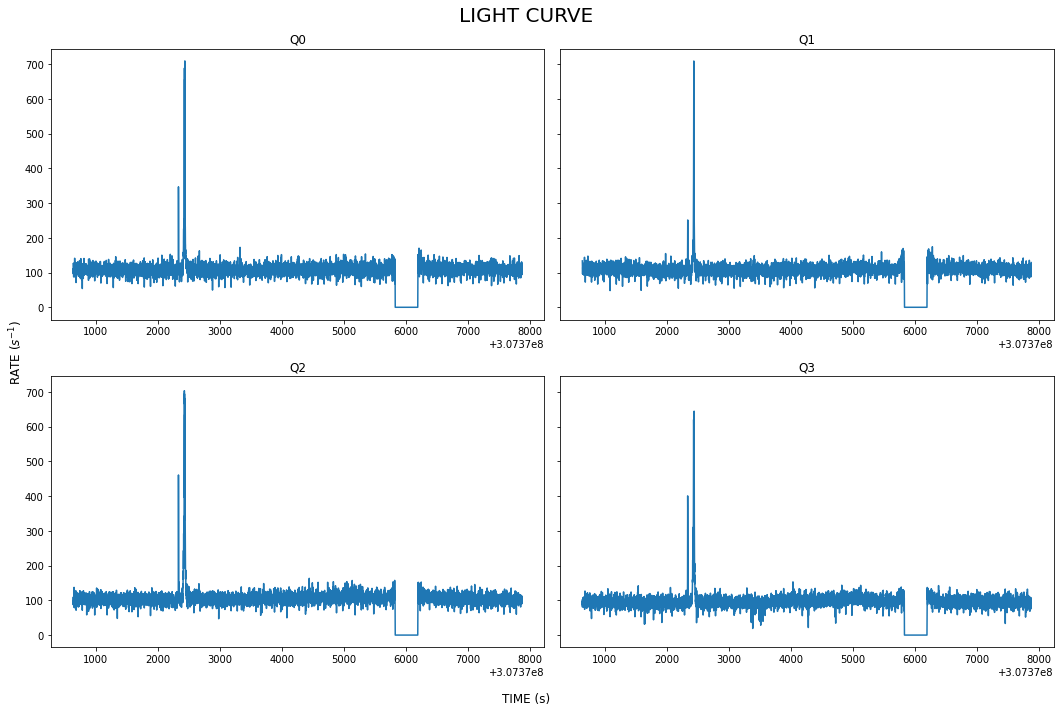

In [190]:
figure, axis = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

figure.suptitle('LIGHT CURVE',fontsize=20)
axis[0, 0].plot(Q0[1].data['TIME'], Q0[1].data['RATE'])
axis[0, 0].set_title("Q0")

axis[0, 1].plot(Q1[1].data['TIME'], Q1[1].data['RATE'])
axis[0, 1].set_title("Q1")

axis[1, 0].plot(Q2[1].data['TIME'], Q2[1].data['RATE'])
axis[1, 0].set_title("Q2")

axis[1, 1].plot(Q3[1].data['TIME'], Q3[1].data['RATE'])
axis[1, 1].set_title("Q3")

figure.supxlabel('TIME (s)')
figure.supylabel('RATE ($s^{-1}$)')
plt.tight_layout()

### Plot Funciton

In [191]:
def plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data):
    figure, axis = plt.subplots(4, 2, figsize=(15, 15))
    
    axis[0, 0].plot(Q0_time, Q0_rate, label = 'Light Curve')
    axis[0, 0].plot(Q0_time, Q0_trend, label = 'Trend')
    axis[0, 0].legend(loc='best')
    axis[0, 0].set_title("Q0")
    axis[0, 1].plot(Q0_time, Q0_detrend_data, label = 'Detrended Curve')
    axis[0, 1].legend(loc='best')
    axis[0, 1].set_title("Q0_detrended")

    axis[1, 0].plot(Q1_time, Q1_rate, label = 'Light Curve')
    axis[1, 0].plot(Q1_time, Q1_trend, label = 'Trend')
    axis[1, 0].legend(loc='best')
    axis[1, 0].set_title("Q0")
    axis[1, 1].plot(Q1_time, Q1_detrend_data, label = 'Detrended Curve')
    axis[1, 1].legend(loc='best')
    axis[1, 1].set_title("Q1_detrended")

    axis[2, 0].plot(Q2_time, Q2_rate, label = 'Light Curve')
    axis[2, 0].plot(Q2_time, Q2_trend, label = 'Trend')
    axis[2, 0].legend(loc='best')
    axis[2, 0].set_title("Q0")
    axis[2, 1].plot(Q2_time, Q2_detrend_data, label = 'Detrended Curve')
    axis[2, 1].legend(loc='best')
    axis[2, 1].set_title("Q2_detrended")

    axis[3, 0].plot(Q3_time, Q3_rate, label = 'Light Curve')
    axis[3, 0].plot(Q3_time, Q3_trend, label = 'Trend')
    axis[3, 0].legend(loc='best')
    axis[3, 0].set_title("Q0")
    axis[3, 1].plot(Q3_time, Q3_detrend_data, label = 'Detrended Curve')
    axis[3, 1].legend(loc='best')
    axis[3, 1].set_title("Q3_detrended")
    
    plt.tight_layout()

### SNR (S-B)/std function

In [192]:
def SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):    
    Q0_rate_max_ind = np.argmax(Q0_detrend_data)
    Q0_noise = np.concatenate((Q0_detrend_data[:Q0_rate_max_ind-250],Q0_detrend_data[Q0_rate_max_ind+250:]))
    Q0_mean , Q0_std = np.mean(Q0_noise) , np.std(Q0_noise)
    Q0_SNR = (max(Q0_detrend_data)-Q0_mean)/Q0_std
    print('Q0 SNR = ',Q0_SNR)

    Q1_rate_max_ind = np.argmax(Q1_detrend_data)
    Q1_noise = np.concatenate((Q1_detrend_data[:Q1_rate_max_ind-250],Q1_detrend_data[Q1_rate_max_ind+250:]))
    Q1_mean , Q1_std = np.mean(Q1_noise) , np.std(Q1_noise)
    Q1_SNR = (max(Q1_detrend_data)-Q1_mean)/Q1_std
    print('Q1 SNR = ',Q1_SNR)

    Q2_rate_max_ind = np.argmax(Q2_detrend_data)
    Q2_noise = np.concatenate((Q2_detrend_data[:Q2_rate_max_ind-250],Q2_detrend_data[Q2_rate_max_ind+250:]))
    Q2_mean , Q2_std = np.mean(Q2_noise) , np.std(Q2_noise)
    Q2_SNR = (max(Q2_detrend_data)-Q2_mean)/Q2_std
    print('Q2 SNR = ',Q2_SNR)

    Q3_rate_max_ind = np.argmax(Q3_detrend_data)
    Q3_noise = np.concatenate((Q3_detrend_data[:Q3_rate_max_ind-250],Q3_detrend_data[Q3_rate_max_ind+250:]))
    Q3_mean , Q3_std = np.mean(Q3_noise) , np.std(Q3_noise)
    Q3_SNR = (max(Q3_detrend_data)-Q3_mean)/Q3_std
    print('Q3 SNR = ',Q3_SNR)

### Mean Filter

Q0 SNR =  38.377106
Q1 SNR =  38.534145
Q2 SNR =  37.589394
Q3 SNR =  36.98282


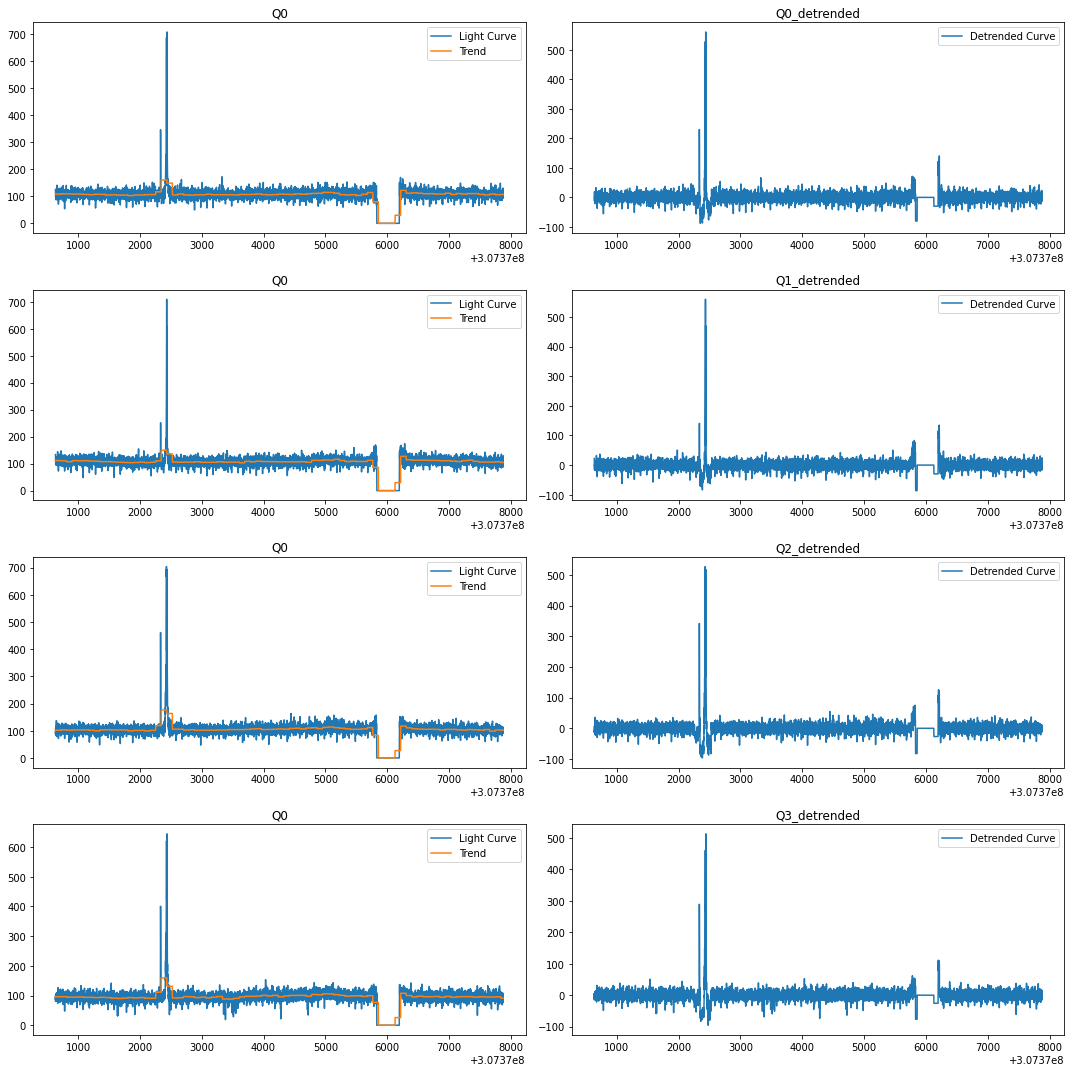

In [193]:
Q0_time = Q0[1].data['TIME']
Q0_rate = Q0[1].data['RATE']
Q0_mfilter = [0]*len(Q0_rate)
windows_size=90
for i in range(0,len(Q0_rate),windows_size):
    Q0_mfilter[i:i+windows_size] = [np.mean(Q0_rate[i:i+windows_size])]*windows_size
Q0_trend=Q0_mfilter[:7240]
Q0_detrend_data = Q0_rate-Q0_trend

Q1_time = Q1[1].data['TIME']
Q1_rate = Q1[1].data['RATE']
Q1_mfilter = [0]*len(Q1_rate)
for i in range(0,len(Q1_rate),windows_size):
    Q1_mfilter[i:i+windows_size] = [np.mean(Q1_rate[i:i+windows_size])]*windows_size
Q1_trend=Q1_mfilter[:7240]
Q1_detrend_data = Q1_rate-Q1_trend

Q2_time = Q2[1].data['TIME']
Q2_rate = Q2[1].data['RATE']
Q2_mfilter = [0]*len(Q2_rate)
for i in range(0,len(Q2_rate),windows_size):
    Q2_mfilter[i:i+windows_size] = [np.mean(Q2_rate[i:i+windows_size])]*windows_size
Q2_trend=Q2_mfilter[:7240]
Q2_detrend_data = Q2_rate-Q2_trend

Q3_time = Q3[1].data['TIME']
Q3_rate = Q3[1].data['RATE']
Q3_mfilter = [0]*len(Q3_rate)
for i in range(0,len(Q3_rate),windows_size):
    Q3_mfilter[i:i+windows_size] = [np.mean(Q3_rate[i:i+windows_size])]*windows_size
Q3_trend=Q3_mfilter[:7240]
Q3_detrend_data = Q3_rate-Q3_trend

plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

### Median Filter

Q0 SNR =  38.811737
Q1 SNR =  39.207302
Q2 SNR =  40.10332
Q3 SNR =  37.591908


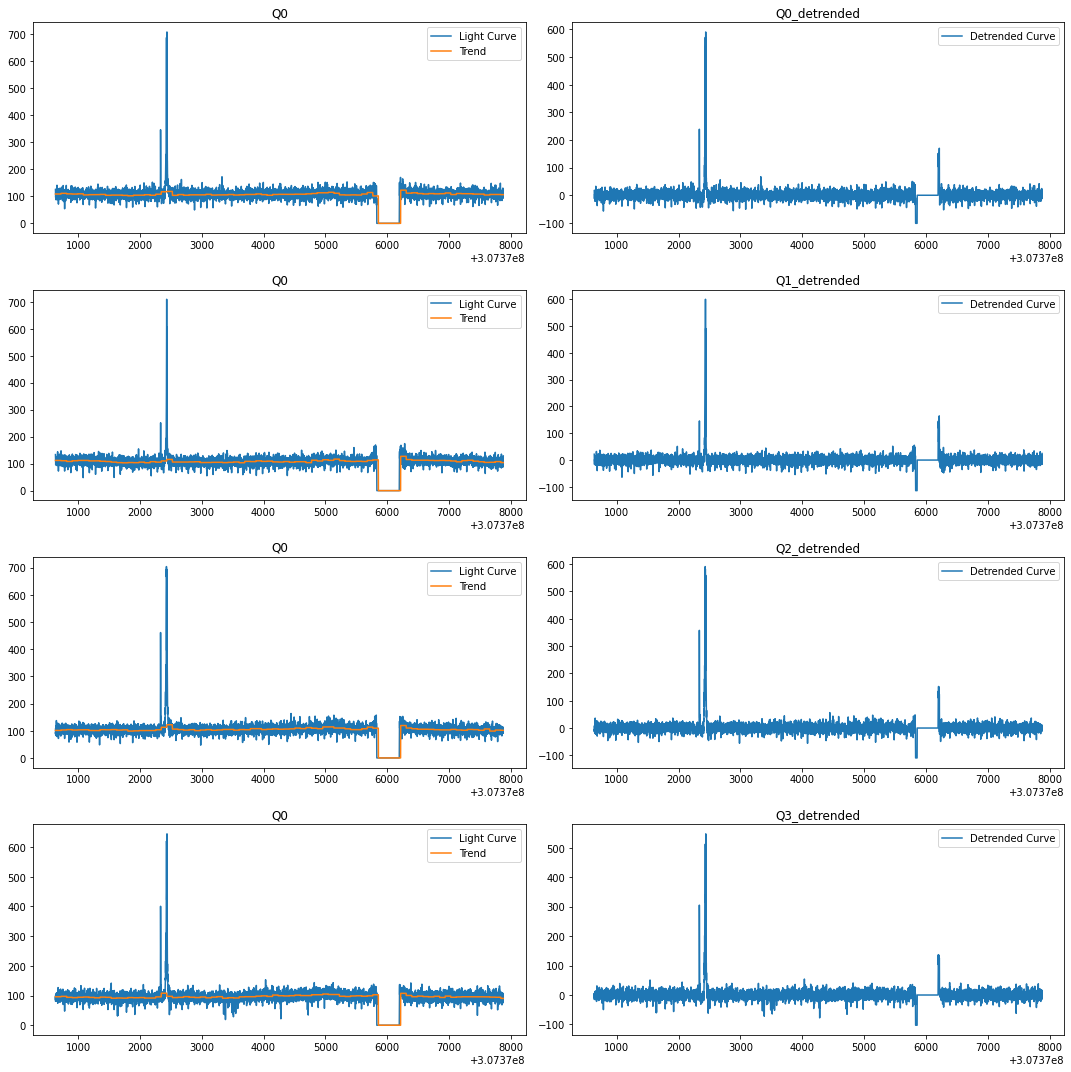

In [194]:
Q0_time = Q0[1].data['TIME']
Q0_rate = Q0[1].data['RATE']
Q0_mfilter = [0]*len(Q0_rate)
windows_size=90
for i in range(0,len(Q0_rate),windows_size):
    Q0_mfilter[i:i+windows_size] = [np.median(Q0_rate[i:i+windows_size])]*windows_size
Q0_trend=Q0_mfilter[:7240]
Q0_detrend_data = Q0_rate-Q0_trend

Q1_time = Q1[1].data['TIME']
Q1_rate = Q1[1].data['RATE']
Q1_mfilter = [0]*len(Q1_rate)
for i in range(0,len(Q1_rate),windows_size):
    Q1_mfilter[i:i+windows_size] = [np.median(Q1_rate[i:i+windows_size])]*windows_size
Q1_trend=Q1_mfilter[:7240]
Q1_detrend_data = Q1_rate-Q1_trend

Q2_time = Q2[1].data['TIME']
Q2_rate = Q2[1].data['RATE']
Q2_mfilter = [0]*len(Q2_rate)
for i in range(0,len(Q2_rate),windows_size):
    Q2_mfilter[i:i+windows_size] = [np.median(Q2_rate[i:i+windows_size])]*windows_size
Q2_trend=Q2_mfilter[:7240]
Q2_detrend_data = Q2_rate-Q2_trend

Q3_time = Q3[1].data['TIME']
Q3_rate = Q3[1].data['RATE']
Q3_mfilter = [0]*len(Q3_rate)
for i in range(0,len(Q3_rate),windows_size):
    Q3_mfilter[i:i+windows_size] = [np.median(Q3_rate[i:i+windows_size])]*windows_size
Q3_trend=Q3_mfilter[:7240]
Q3_detrend_data = Q3_rate-Q3_trend

plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

SNR_SBstd(Q0_detrend_data,Q1_detrend_data,Q2_detrend_data,Q3_detrend_data)

Q0 SNR =  39.08117080961352
Q1 SNR =  41.10504471724176
Q2 SNR =  38.23977429241274
Q3 SNR =  36.05517198703766


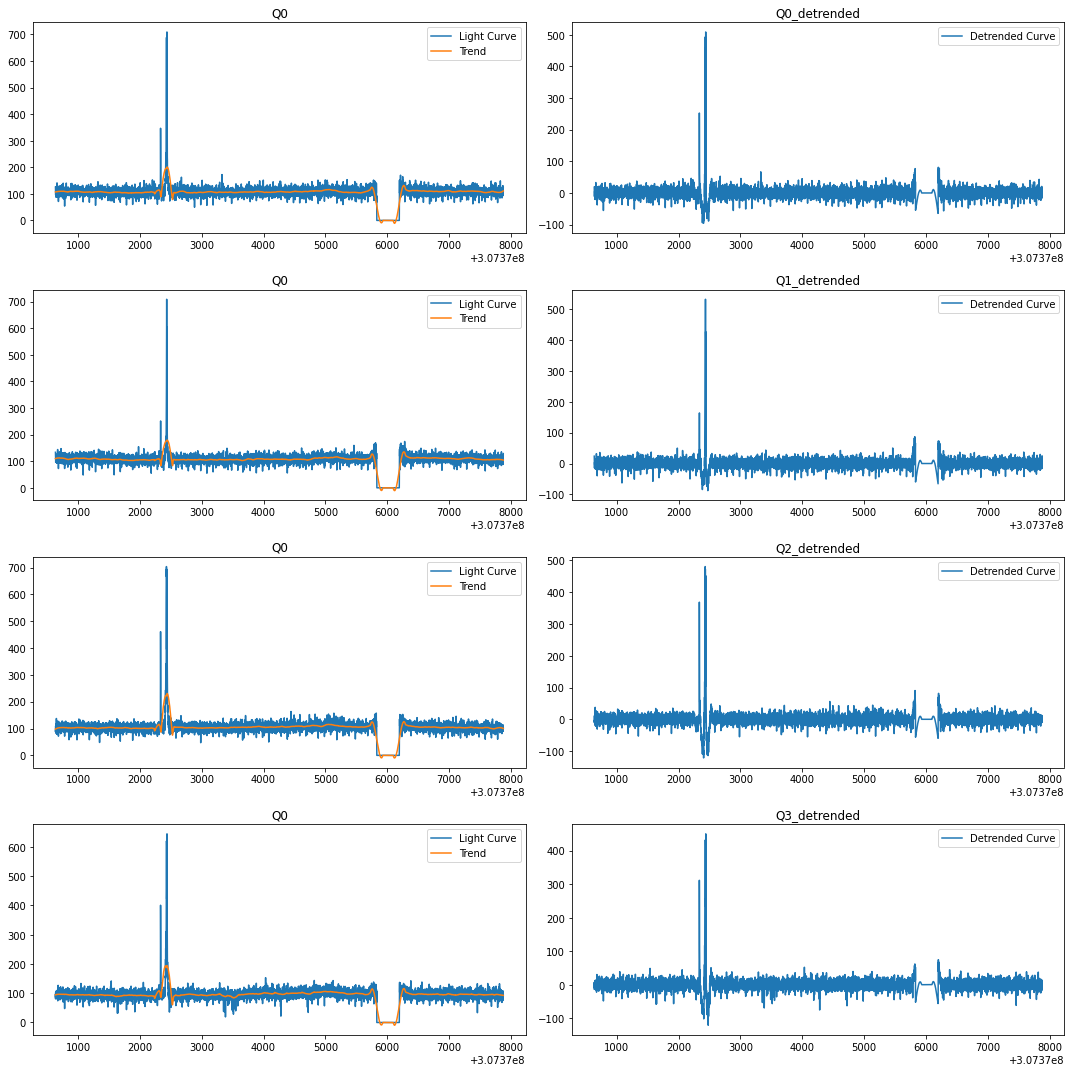

In [195]:
window_length = 200
polyorder=3

Q0_time = Q0[1].data['TIME']
Q0_rate = Q0[1].data['RATE']
Q0_trend = signal.savgol_filter(Q0[1].data['RATE'] , window_length, polyorder)
Q0_detrend_data = Q0_rate-Q0_trend

Q1_time = Q0[1].data['TIME']
Q1_rate = Q1[1].data['RATE']
Q1_trend = signal.savgol_filter(Q1[1].data['RATE'] , window_length, polyorder)
Q1_detrend_data = Q1_rate-Q1_trend

Q2_time = Q0[1].data['TIME']
Q2_rate = Q2[1].data['RATE']
Q2_trend = signal.savgol_filter(Q2[1].data['RATE'] , window_length, polyorder)
Q2_detrend_data = Q2_rate-Q2_trend

Q3_time = Q0[1].data['TIME']
Q3_rate = Q3[1].data['RATE']
Q3_trend = signal.savgol_filter(Q3[1].data['RATE'] , window_length, polyorder)
Q3_detrend_data = Q3_rate-Q3_trend

plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

SNR_SBstd(Q0_detrend_data,Q1_detrend_data,Q2_detrend_data,Q3_detrend_data)